week-2/day-3/assignment-3:-

Dataset: Customer purchase amounts

1. Plot histogram and fit normal distribution

2. Identify probability of a customer spending above a thereshold

3. Simulate random sales data and comapre to theoretical distribution



In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 1000
purchase_amount = np.random.normal(loc=600, scale=120, size=n)

# Remove negative values (real-world constraint)
purchase_amount = purchase_amount[purchase_amount > 0]

dataset = pd.DataFrame({
    "customer_id": [f"C{i+1:04d}" for i in range(len(purchase_amount))],
    "purchase_amount": purchase_amount
})

dataset.head()


,customer_id,purchase_amount
0,C0001,659.605698
1,C0002,583.408284
2,C0003,677.722625
3,C0004,782.763583
4,C0005,571.901595


In [ ]:
dataset.shape

(1000, 2)

# Plot Histogram & Fit Normal Distribution

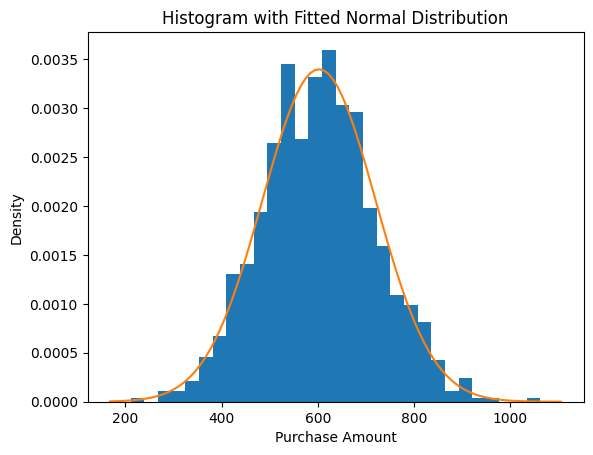

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

mean = dataset['purchase_amount'].mean()
std = dataset['purchase_amount'].std()

plt.hist(dataset['purchase_amount'], bins=30, density=True)
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mean, std)

plt.plot(x, pdf)
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.title("Histogram with Fitted Normal Distribution")
plt.show()


# Probability of Customer Spending Above a Threshold

In [ ]:
from scipy.stats import norm

threshold = 800

probability = 1 - norm.cdf(threshold, mean, std)
probability


np.float64(0.04625537638865951)

# Simulate Random Sales Data & Compare to Theoretical Distribution

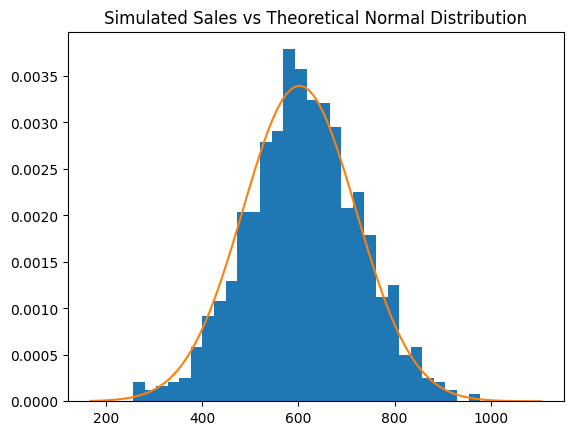

In [ ]:
simulated_sales = np.random.normal(mean, std, size=1000)

plt.hist(simulated_sales, bins=30, density=True)
plt.plot(x, pdf)
plt.title("Simulated Sales vs Theoretical Normal Distribution")
plt.show()
